# Visualize Voices and Sounds

In [25]:
import numpy as np
try:
    import pyaudio
except:
    !pip3 install pyaudio
    import pyaudio
    
try:
    import librosa, librosa.display
except:
    !pip3 install librosa
    import librosa, librosa.display
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

import IPython.display as ipd
import time

In [26]:
sr = 20000
chunk_size = sr // 4

In [27]:
p = pyaudio.PyAudio()

print("----------------------record device list---------------------")
info = p.get_host_api_info_by_index(0)
numdevices = info.get('deviceCount')
for i in range(0, numdevices):
        if (p.get_device_info_by_host_api_device_index(0, i).get('maxInputChannels')) > 0:
            print("Input Device id ", i, " - ", p.get_device_info_by_host_api_device_index(0, i).get('name'))

print("-------------------------------------------------------------")

----------------------record device list---------------------
Input Device id  0  -  Logitech Speakerphone P710e
Input Device id  2  -  MacBook Pro Microphone
Input Device id  4  -  Microsoft Teams Audio
-------------------------------------------------------------


## Collect Microphone data

In [28]:
stream = p.open(format=pyaudio.paFloat32,channels=1,rate=sr,input=True,input_device_index=2,frames_per_buffer=chunk_size)

alldata =[]
frames = []

do_melspec = librosa.feature.melspectrogram
pwr_to_db = librosa.core.power_to_db
tf = 10
start = time.time()
while (time.time() < start + tf):
    data = stream.read(chunk_size,exception_on_overflow = False)
    data = np.frombuffer(data, dtype=np.float32)
    alldata.append(data)
    melspec = do_melspec(y=data, sr=sr, n_mels=128, fmax=4096)
    norm_melspec = pwr_to_db(melspec, ref=np.max)
    frames.append(norm_melspec)
    print(f"{time.time() - start:.1f} ",  end = '')

signal = np.hstack(alldata)
stack = np.hstack(frames)

0.2 0.5 0.7 1.0 1.3 1.5 1.8 2.0 2.3 2.5 2.8 3.1 3.3 3.6 3.7 4.0 4.2 4.5 4.8 5.0 5.3 5.5 5.8 6.0 6.3 6.5 6.8 7.1 7.2 7.5 7.7 8.0 8.3 8.5 8.8 9.0 9.3 9.5 9.8 10.1 

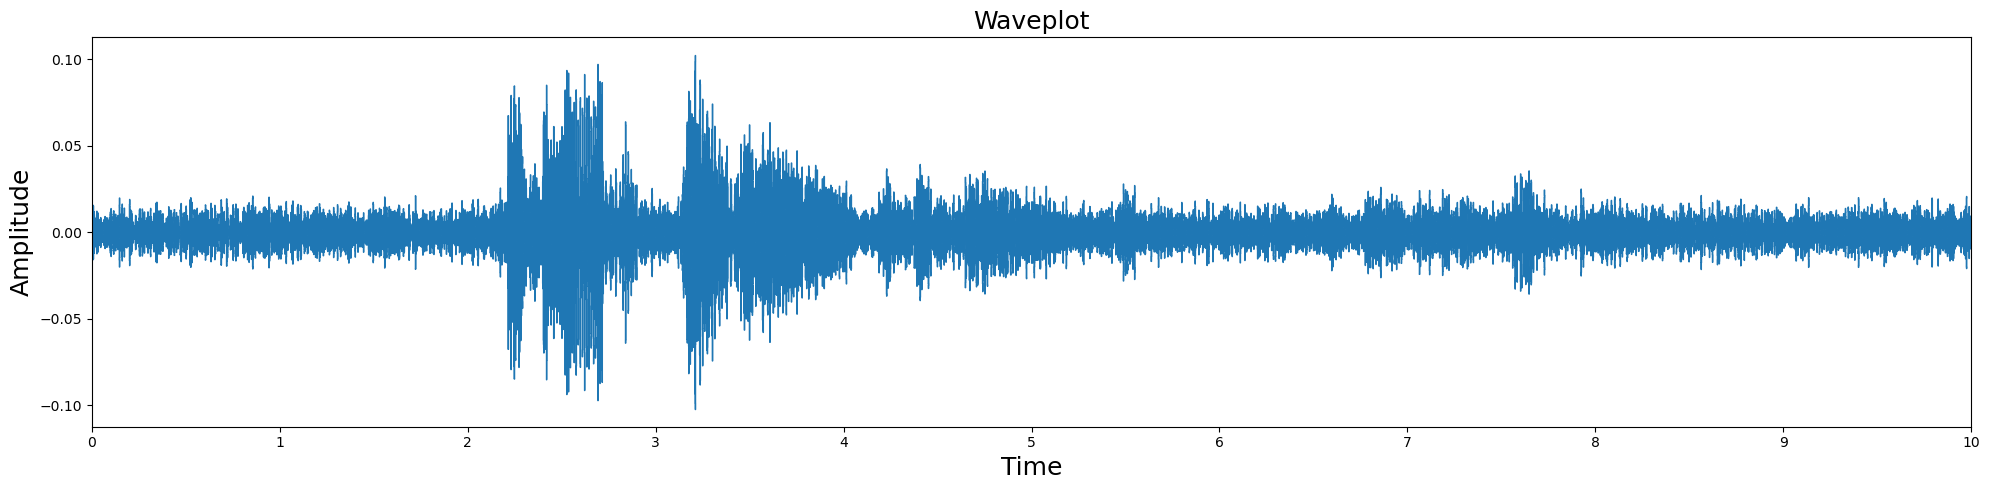

In [29]:
plt.figure(figsize=(20, 5))
librosa.display.waveshow(signal, sr=sr)
plt.title('Waveplot', fontdict=dict(size=18))
plt.xlabel('Time', fontdict=dict(size=18))
plt.ylabel('Amplitude', fontdict=dict(size=18))
plt.xlim(0,tf)
plt.savefig('./data/mic_0.png', bbox_inches='tight', dpi=300)
plt.show()

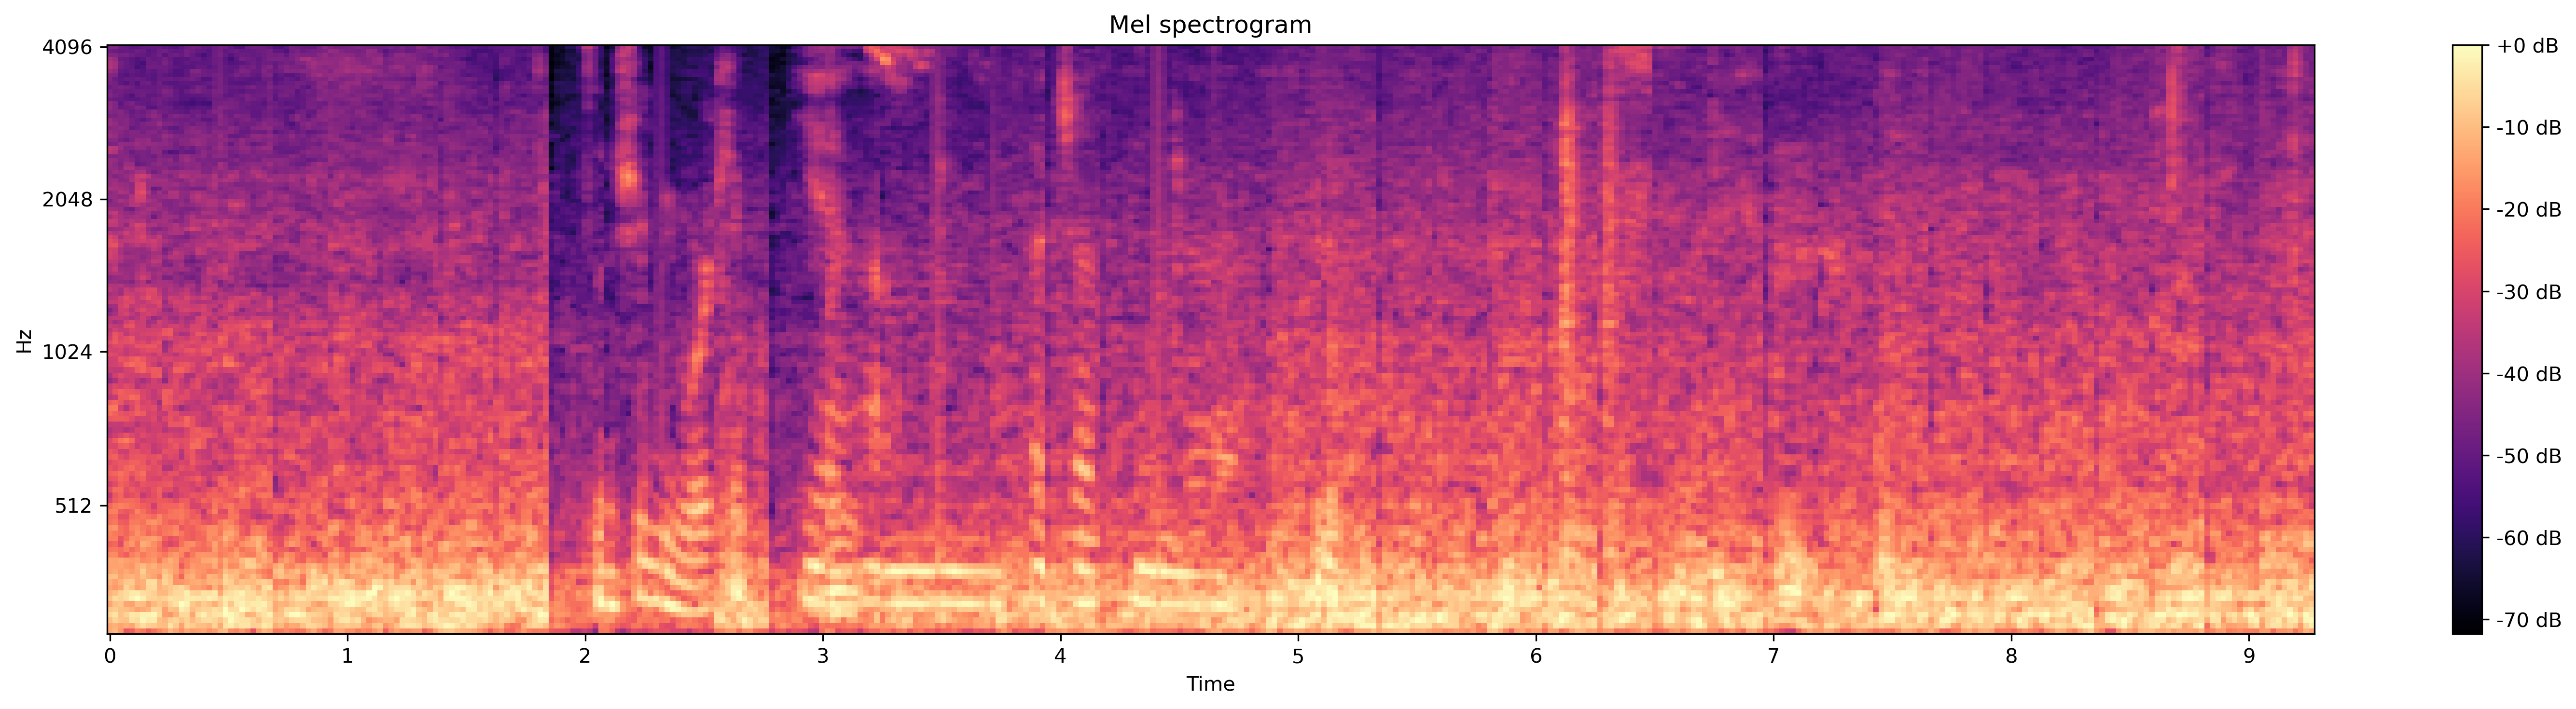

In [30]:
plt.figure(1,figsize=(20, 5),dpi=300)
librosa.display.specshow(stack, y_axis='mel', fmin = 100, fmax = 4096, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.savefig('./data/mic_1.png', bbox_inches='tight', dpi=300)
plt.show()

In [31]:
def plotdata(titledata):
    plt.figure(figsize=(20, 5),dpi=300)
    librosa.display.waveshow(signal, sr=sr)
    plt.title(titledata, fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=15))
    plt.ylabel('Amplitude', fontdict=dict(size=15))
    fname = ['./data/'+titledata+'_0.png'] 
    plt.savefig(str(fname[0]), bbox_inches='tight', dpi=300)
    plt.show()

    mel_signal = librosa.feature.melspectrogram(y=signal, sr=sr, hop_length=hop_length, n_fft=n_fft)
    power_to_db = librosa.power_to_db(np.abs(mel_signal), ref=np.max)

    plt.figure(figsize=(20, 5),dpi=300)
    librosa.display.specshow(power_to_db, sr=sr, x_axis='time', y_axis='mel', cmap='magma', hop_length=hop_length)
    plt.colorbar(label='dB')
    plt.title('Mel-Spectrogram (dB)', fontdict=dict(size=18))
    plt.xlabel('Time', fontdict=dict(size=18))
    plt.ylabel('Frequency', fontdict=dict(size=18))
    fname = ['./data/'+titledata+'_1.png'] 
    plt.savefig(str(fname[0]), bbox_inches='tight', dpi=300)
    plt.show()
    
    ipd.Audio(signal, rate=sr)

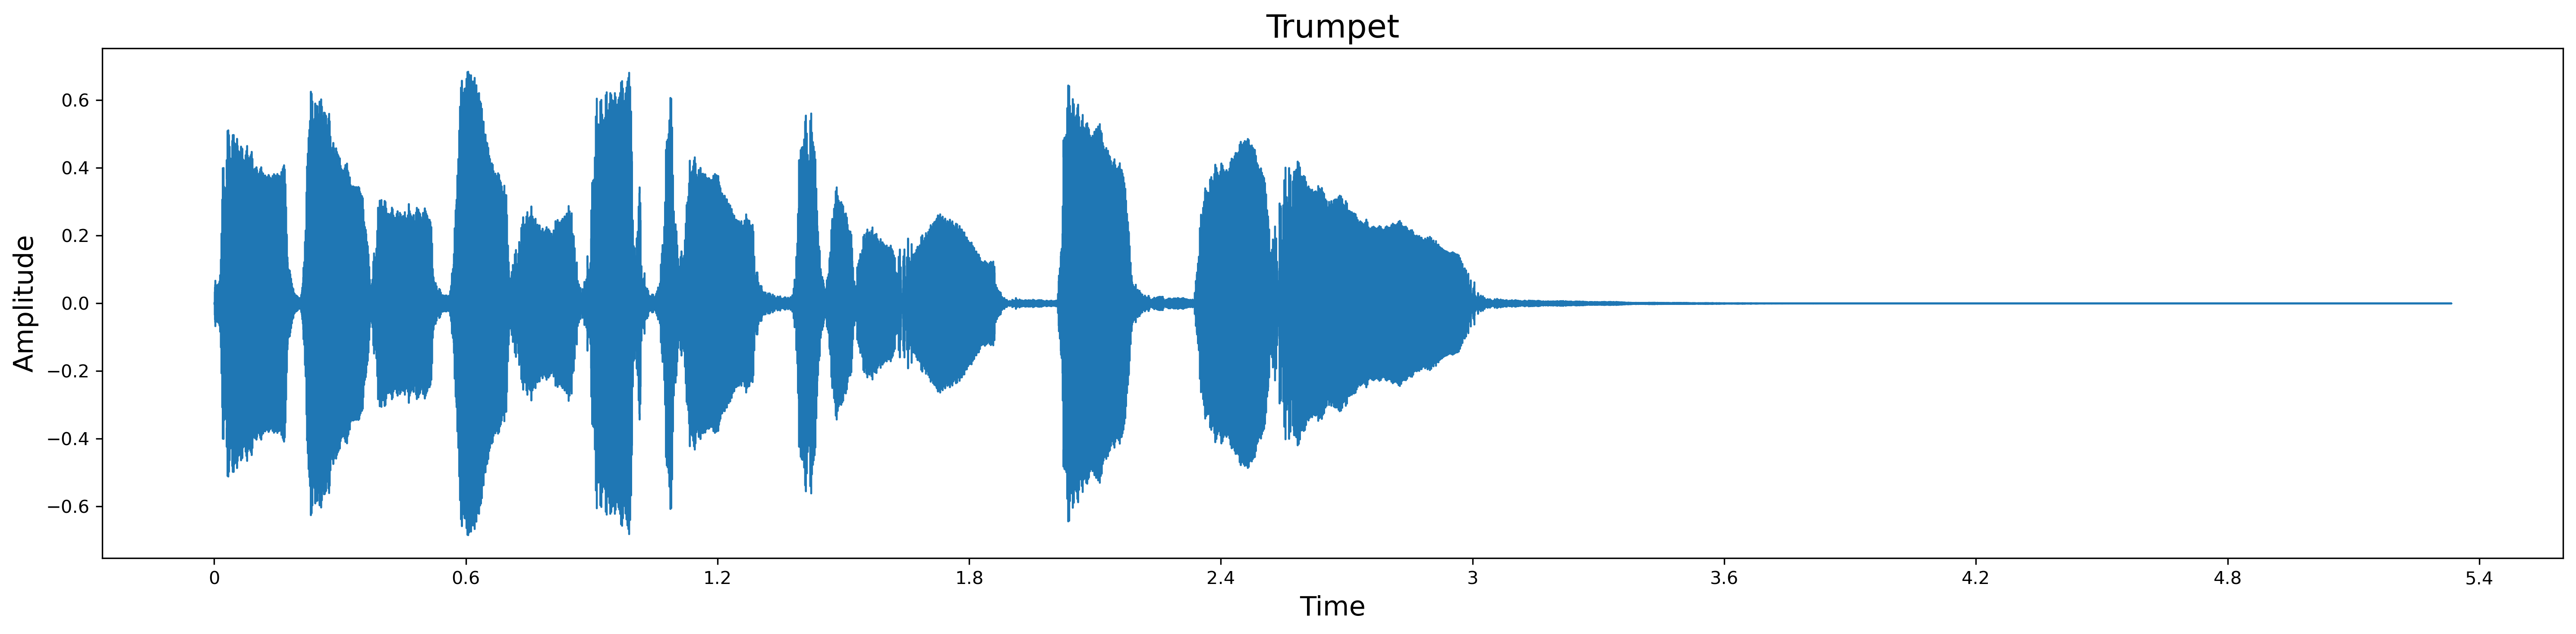

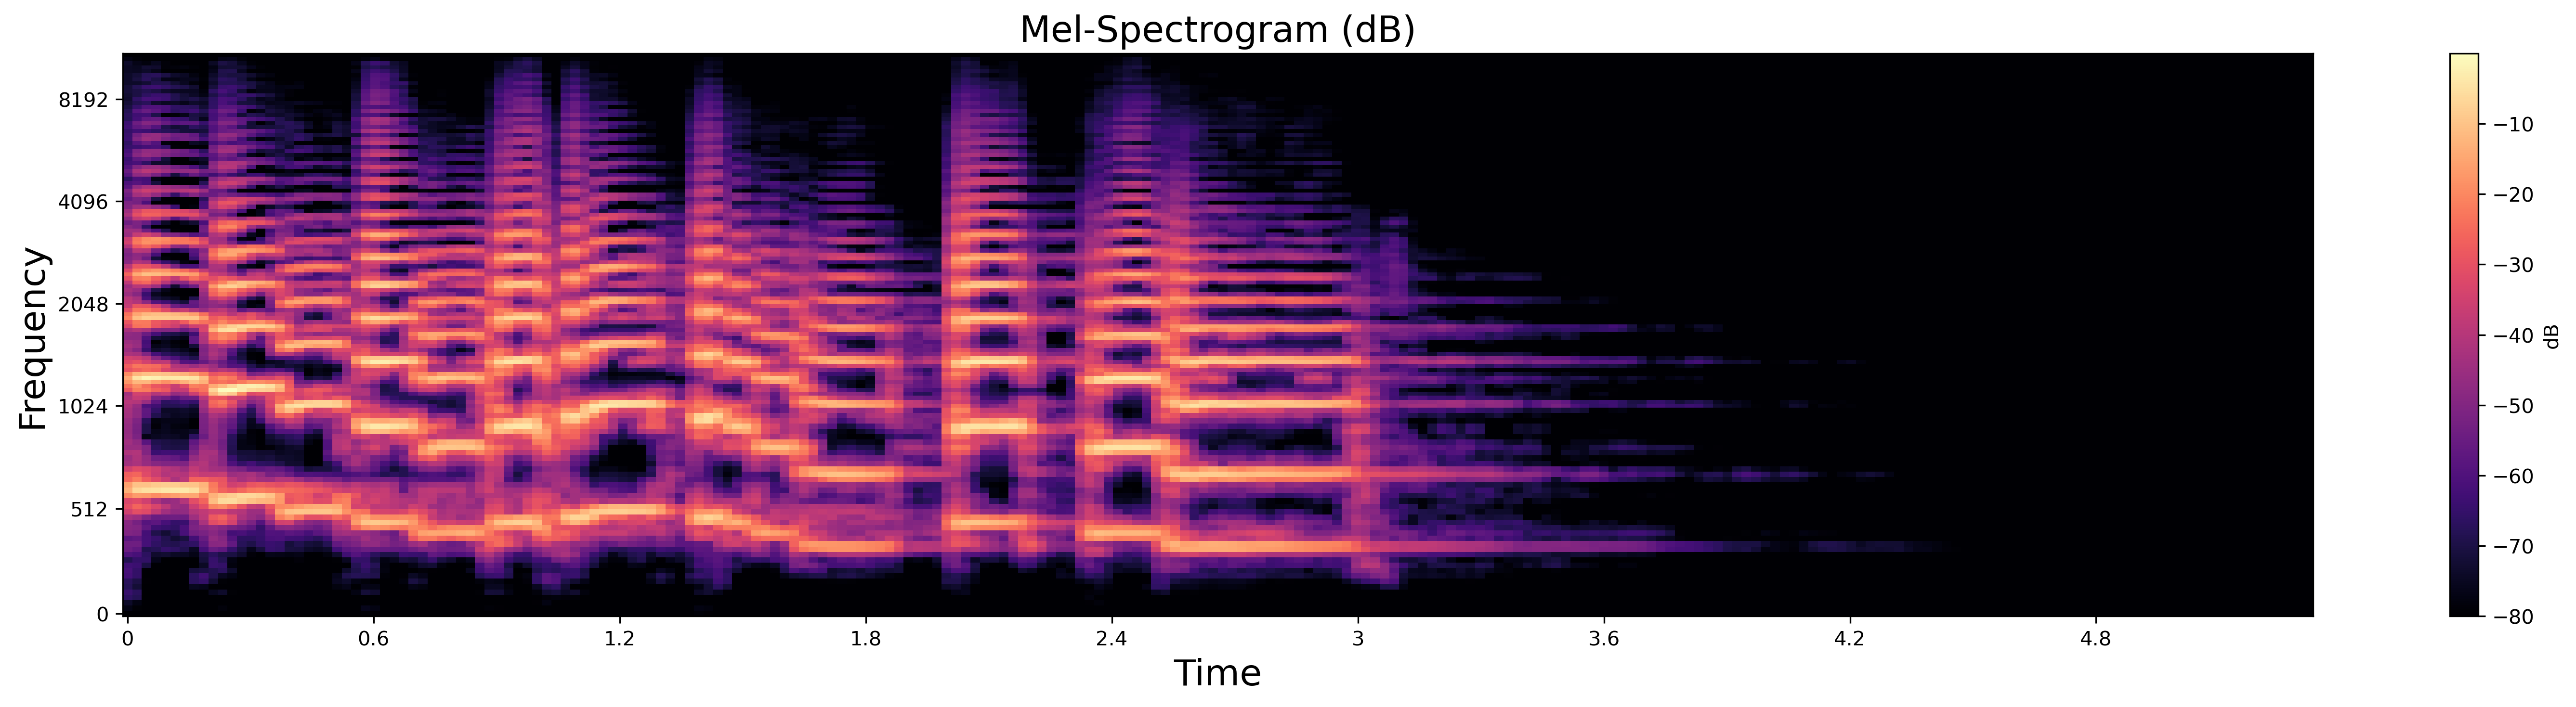

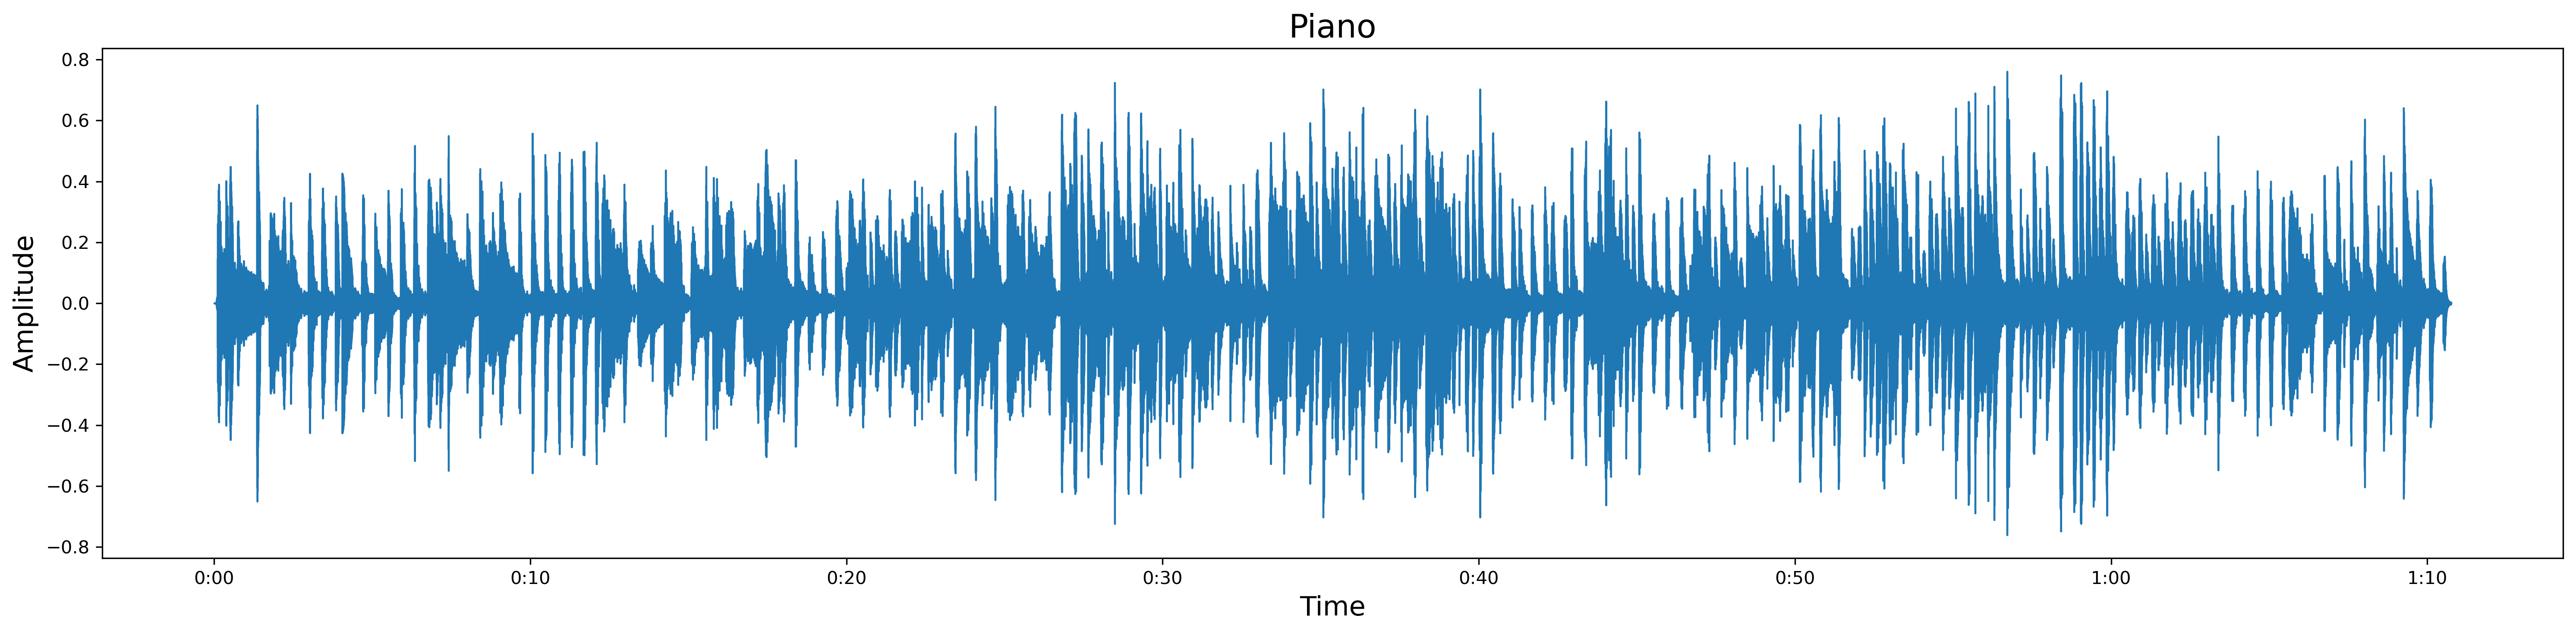

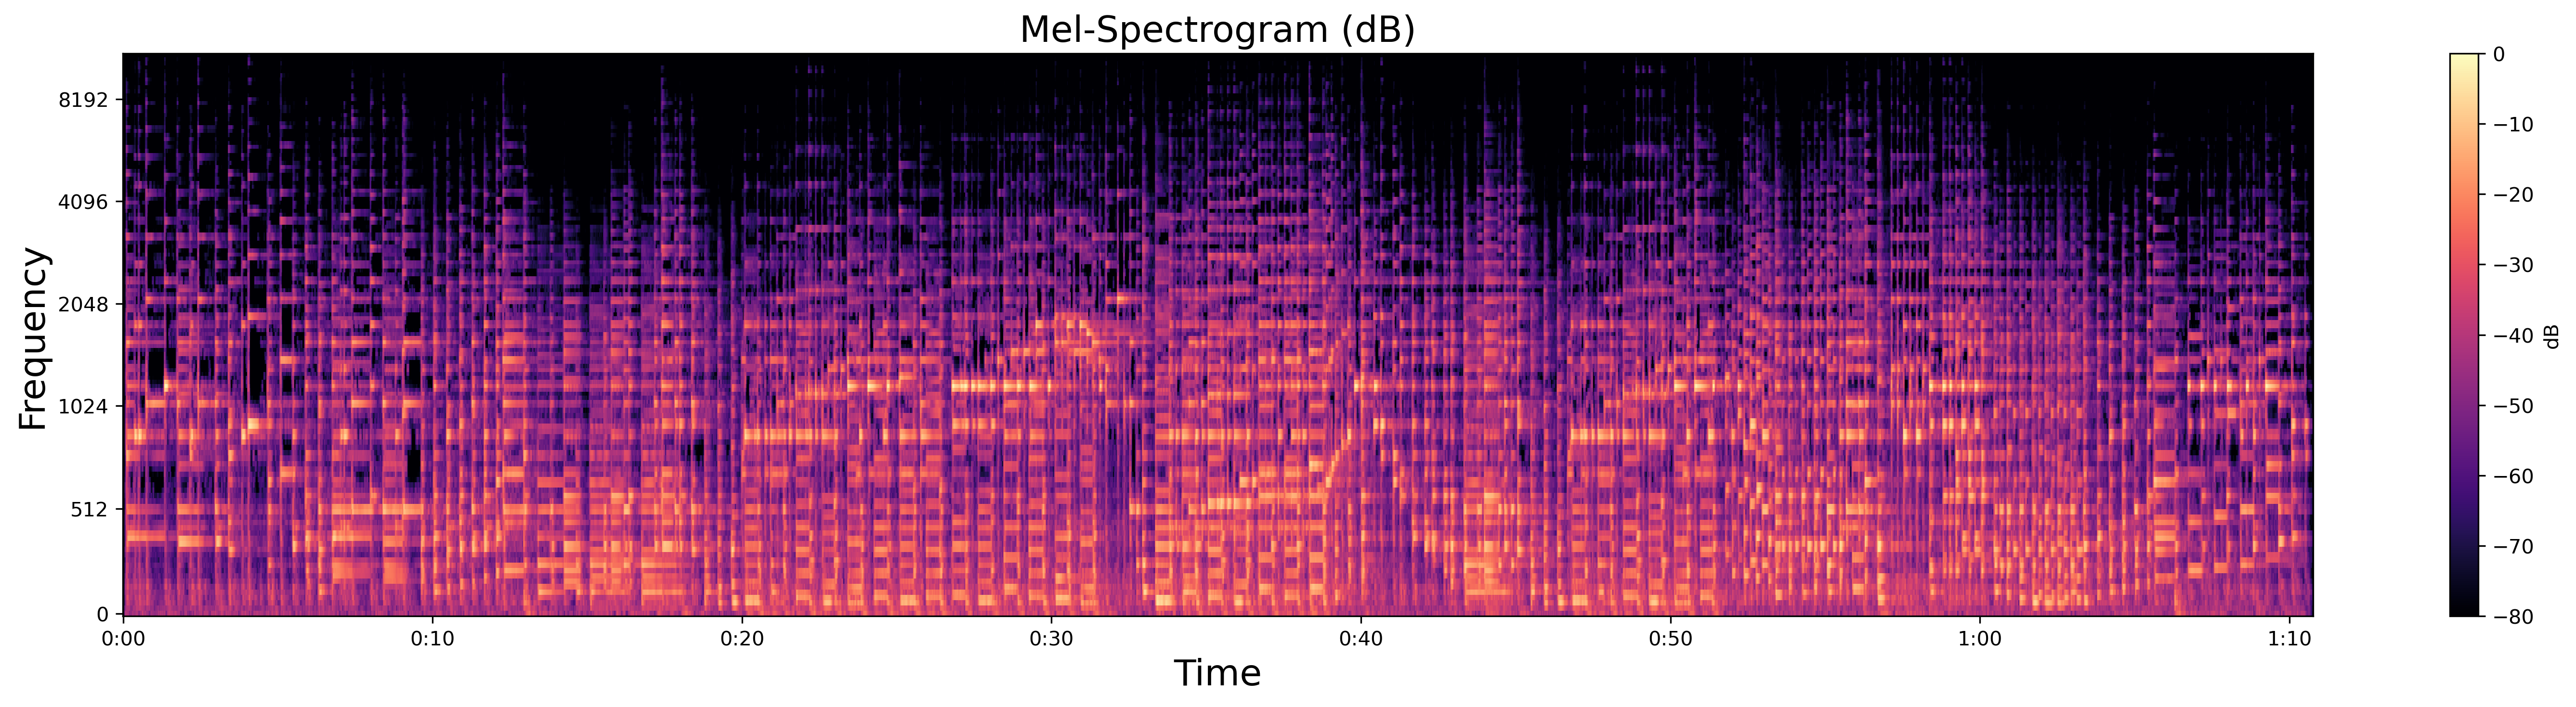

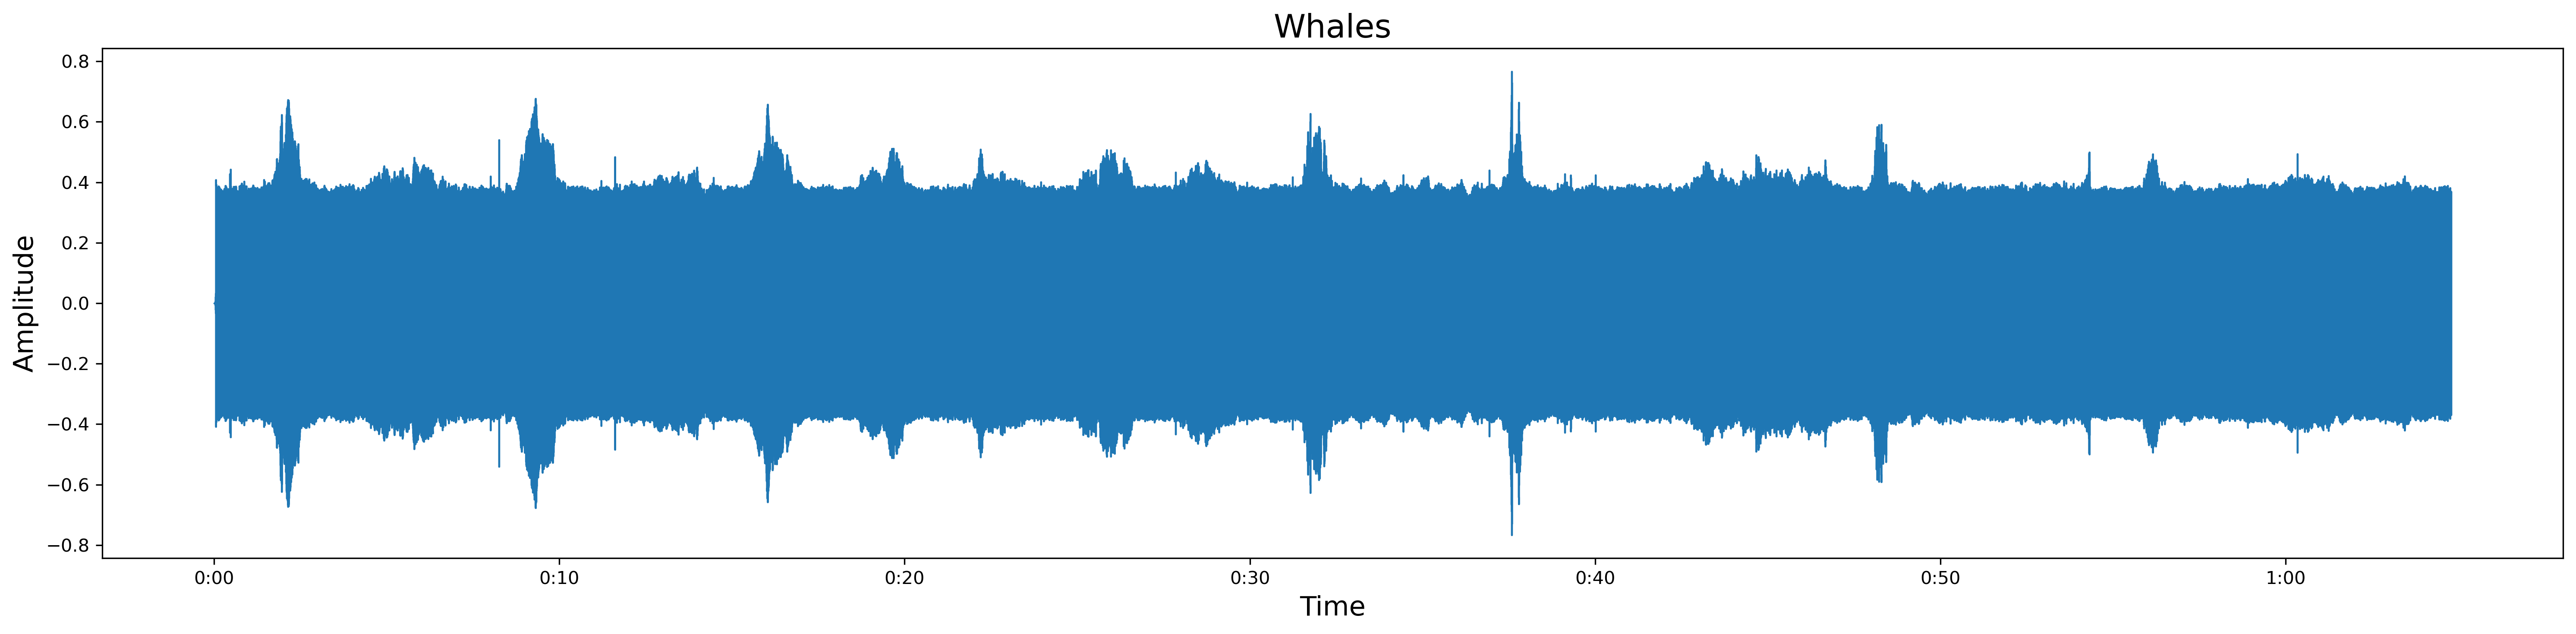

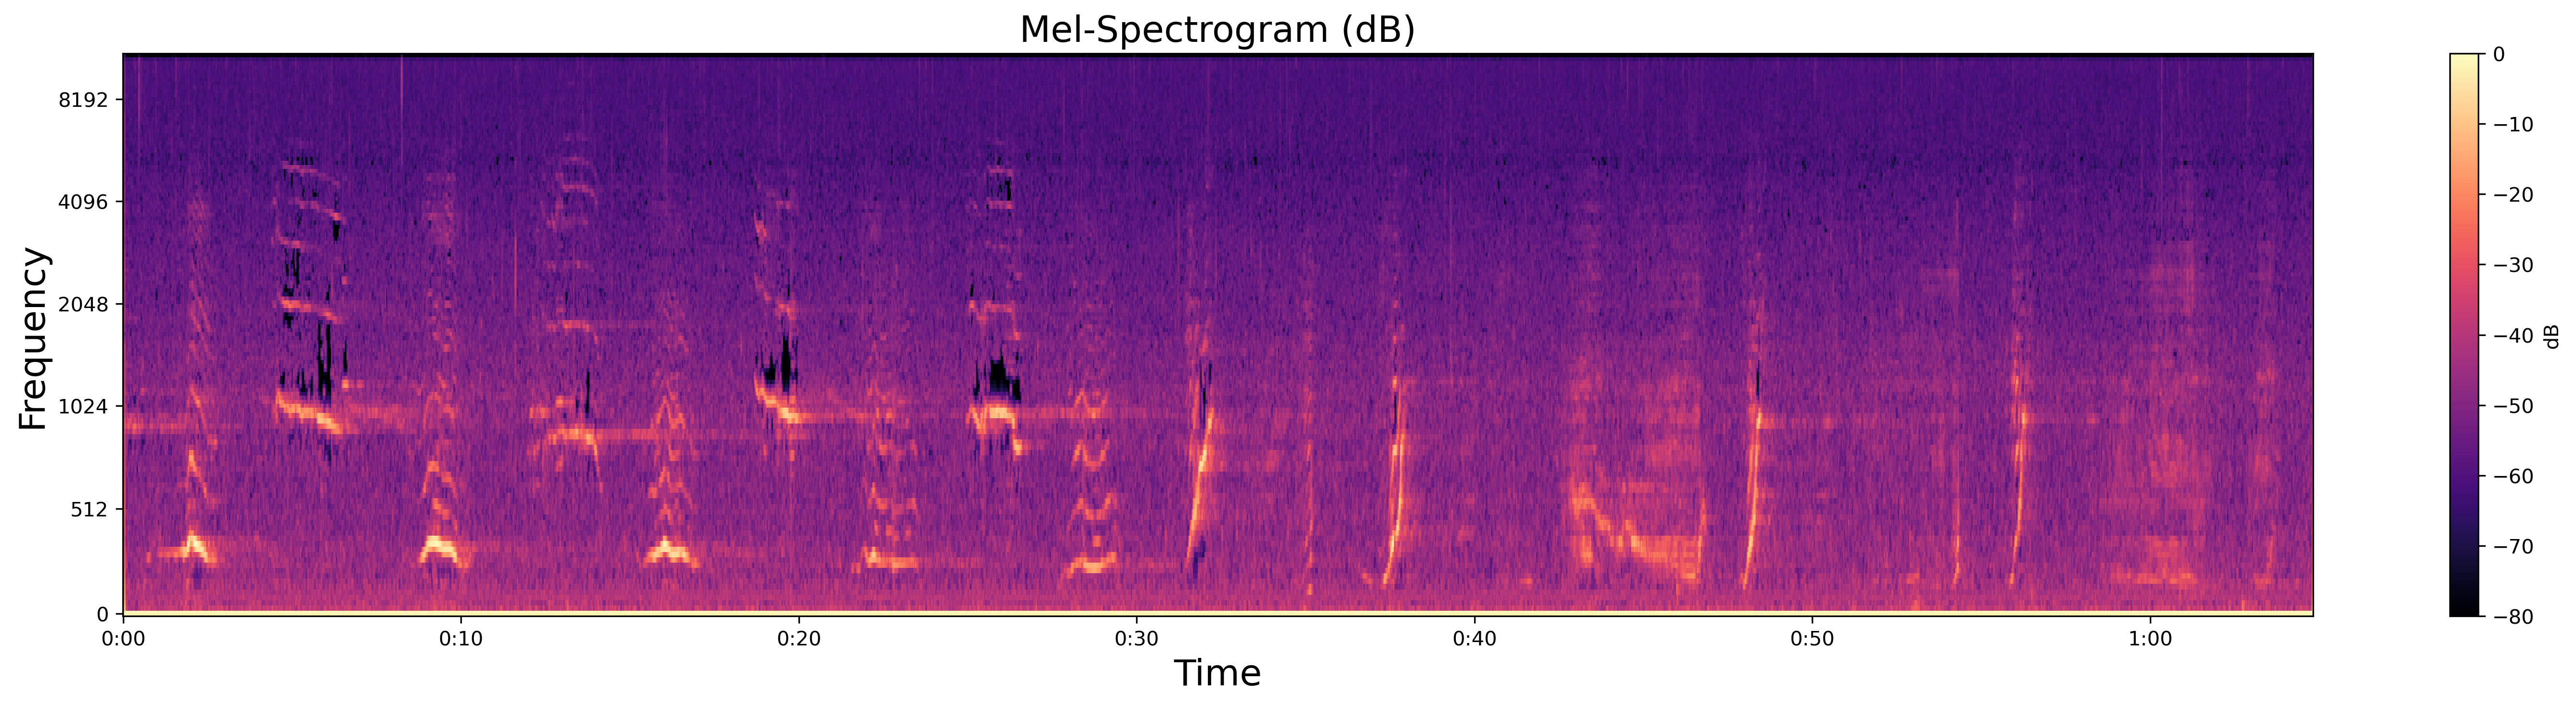

In [32]:
# this is the number of samples in a window per fft
n_fft = 2048
# The amount of samples we are shifting after each fft
hop_length = 512

signal, sr = librosa.load(librosa.util.example('trumpet'))
plotdata('Trumpet')

signal, sr = librosa.load(librosa.util.example('pistachio'))
plotdata('Piano')

signal, sr = librosa.load(librosa.util.example('humpback'))
plotdata('Whales')
